In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [3]:
# It ensures that the random numbers generated by NumPy will be reproducible.
np.random.seed(420)

In [4]:
num_samples = 100

In [5]:
# Generate weight data
weight = np.sort(np.random.normal(loc=172, scale=29, size=num_samples))
print(weight)

[106.9423456  109.49292099 114.04854343 116.75053846 117.83848833
 121.28951735 121.59211677 122.34628581 132.85072249 132.90074265
 134.73856693 136.07880048 137.85757427 138.56062653 139.24973576
 139.85865087 141.74901472 141.87845643 142.00128136 142.47568335
 143.25347964 146.80328451 146.96427292 147.19719808 149.72405756
 149.86957968 150.34172456 150.48541365 150.80963428 151.59901297
 151.70192223 153.1291196  154.71501376 155.42950184 155.52187626
 155.60158627 155.70304452 156.03002798 156.63996985 156.73956789
 157.07007102 157.27915112 157.91286561 157.92366528 158.73611201
 161.57039523 161.90842401 162.90716544 164.22983224 164.77473398
 166.3805173  166.80538587 167.96212584 168.16686782 168.37152019
 169.4085712  169.45481685 172.50962784 172.91627237 173.84212425
 176.78666683 177.18001593 179.59572337 180.78634194 181.59048834
 181.86772959 182.72201798 182.73126482 182.99707892 183.39681649
 186.38377005 186.57221752 186.93991464 187.85746221 189.43763838
 189.93284

In [6]:
# Generate obesity labels
obese = np.where(np.random.uniform(size=num_samples) < (np.argsort(weight) + 1) / num_samples, 1, 0)
print(obese)

[0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1
 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1]


In [13]:
random_number = np.random.uniform(size=num_samples) 
print(random_number)

[6.87795252e-01 9.13645099e-01 6.40045121e-01 8.27926980e-01
 1.30863254e-01 7.22187653e-01 4.82151336e-01 7.65130587e-01
 7.18553855e-01 5.05464969e-02 9.03913806e-02 6.88558281e-01
 9.25435381e-01 3.28666924e-01 6.29965576e-01 7.68511786e-01
 4.31066053e-01 2.83020703e-01 5.07396036e-01 2.13237059e-01
 4.28593501e-01 3.36404140e-01 6.89877456e-01 9.37269972e-01
 8.47230016e-01 6.77592491e-03 3.90033396e-01 3.85674698e-01
 1.62208461e-01 1.91527363e-01 4.49462816e-01 1.16812187e-01
 8.89536151e-01 2.56963068e-02 3.35233227e-02 8.89456920e-01
 5.01150749e-01 4.36671671e-01 6.22809134e-01 5.00426624e-01
 4.25458762e-01 1.81275554e-01 6.17252571e-01 1.72958834e-01
 3.53156654e-01 3.01425592e-01 8.24294806e-01 1.06290612e-01
 6.88192624e-01 1.18842918e-01 3.77816220e-01 9.33151710e-01
 8.45708492e-01 6.10373487e-01 9.63766648e-01 6.00600567e-01
 5.45146670e-01 3.26508158e-01 6.30131410e-01 3.99116711e-01
 9.42421544e-01 7.29800694e-01 7.24192140e-01 7.48898090e-01
 4.29362058e-01 7.075202

In [18]:
weight = np.argsort(weight) 
print(weight)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [15]:
rank = (np.argsort(weight) + 1) / num_samples
print(rank)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99 1.  ]


In [11]:
obese = np.where(random_number < rank, 1, 0)
print(obese)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


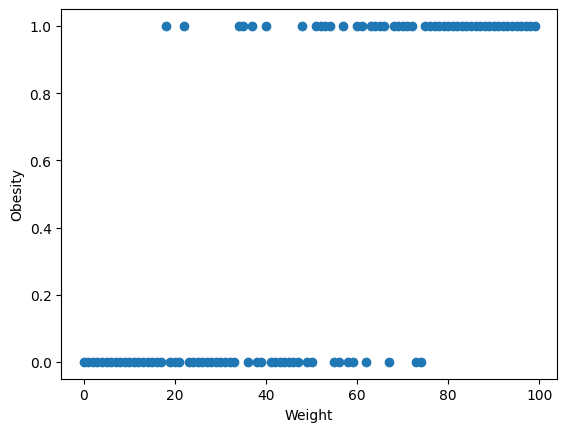

In [19]:
# Plot the data
plt.scatter(weight, obese)
plt.xlabel('Weight')
plt.ylabel('Obesity')
plt.show()

In [20]:
# Fit logistic regression to the data
logreg = LogisticRegression()
logreg.fit(weight.reshape(-1, 1), obese)

LogisticRegression()

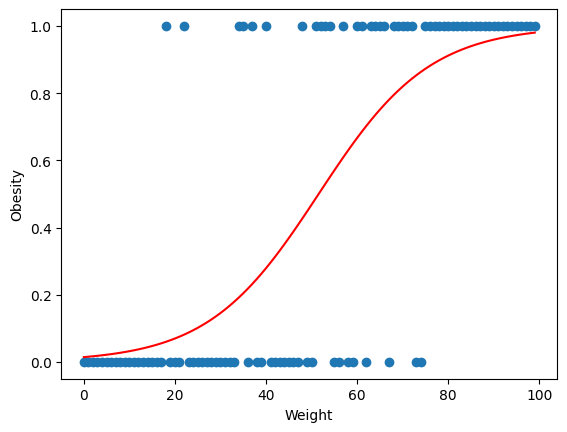

In [21]:
# Plot logistic regression line
plt.scatter(weight, obese)
plt.plot(weight, logreg.predict_proba(weight.reshape(-1, 1))[:, 1], color='red')
plt.xlabel('Weight')
plt.ylabel('Obesity')
plt.show()

In [22]:
# Calculate ROC curve and AUC for logistic regression
fpr_logreg, tpr_logreg, _ = roc_curve(obese, logreg.predict_proba(weight.reshape(-1, 1))[:, 1])
auc_logreg = roc_auc_score(obese, logreg.predict_proba(weight.reshape(-1, 1))[:, 1])

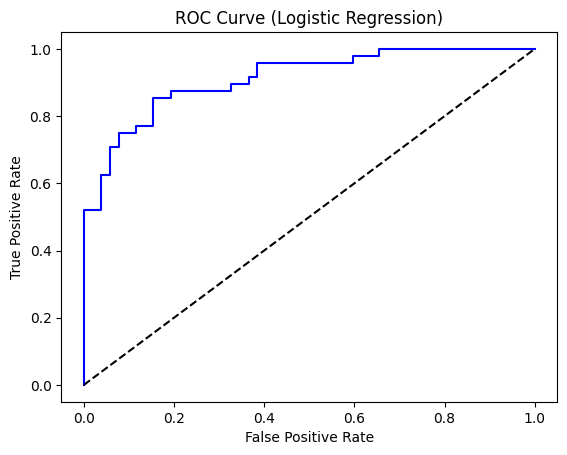

In [23]:
# Plot ROC curve for logistic regression
plt.plot(fpr_logreg, tpr_logreg, color='blue')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.show()

In [24]:
# Fit random forest to the data
rf = RandomForestClassifier()
rf.fit(weight.reshape(-1, 1), obese)

RandomForestClassifier()

In [25]:
# Calculate ROC curve and AUC for random forest
fpr_rf, tpr_rf, _ = roc_curve(obese, rf.predict_proba(weight.reshape(-1, 1))[:, 1])
auc_rf = roc_auc_score(obese, rf.predict_proba(weight.reshape(-1, 1))[:, 1])

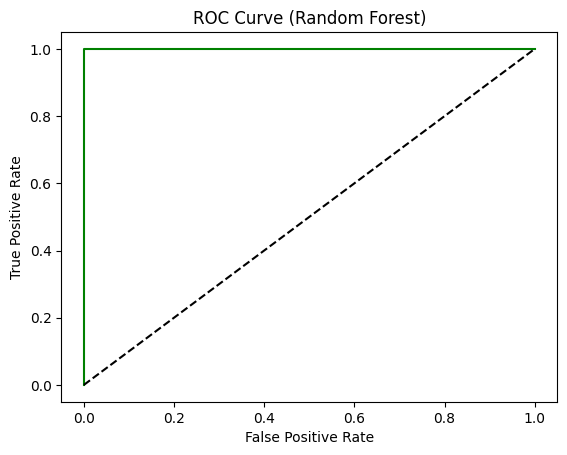

In [26]:
# Plot ROC curve for random forest
plt.plot(fpr_rf, tpr_rf, color='green')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.show()

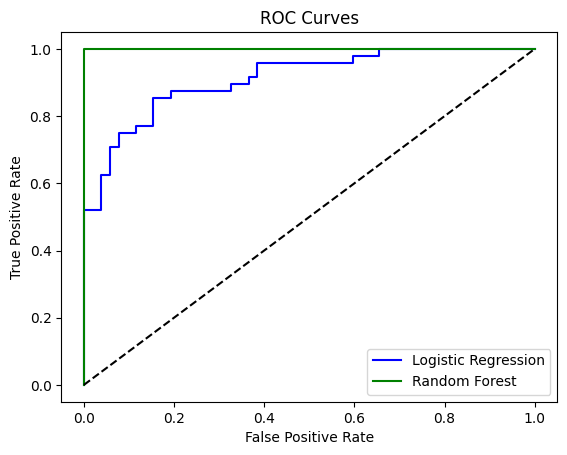

In [27]:
# Plot both ROC curves on the same graph
plt.plot(fpr_logreg, tpr_logreg, color='blue', label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, color='green', label='Random Forest')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [28]:
# Print AUC scores
print('Logistic Regression AUC:', auc_logreg)
print('Random Forest AUC:', auc_rf)

Logistic Regression AUC: 0.9122596153846154
Random Forest AUC: 1.0
